In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType

spark = SparkSession.builder.getOrCreate()

# Schema
schema = StructType([
    StructField("order_id", StringType()),
    StructField("region", StringType()),
    StructField("category", StringType()),
    StructField("quantity", IntegerType()),
    StructField("price", DoubleType())
])

# Inline data
data = [
    ("O001", "South", "Electronics", 3, 15000.0),
    ("O002", "North", "Clothing", 5, 2000.0),
    ("O003", "East", "Furniture", 2, 12000.0),
    ("O004", "West", "Electronics", 1, 18000.0),
    ("O005", "North", "Furniture", 4, 9000.0),
    ("O006", "South", "Clothing", 6, 2500.0),
    ("O007", "East", "Electronics", 2, 17000.0)
]

df = spark.createDataFrame(data, schema)
df.show()

+--------+------+-----------+--------+-------+
|order_id|region|   category|quantity|  price|
+--------+------+-----------+--------+-------+
|    O001| South|Electronics|       3|15000.0|
|    O002| North|   Clothing|       5| 2000.0|
|    O003|  East|  Furniture|       2|12000.0|
|    O004|  West|Electronics|       1|18000.0|
|    O005| North|  Furniture|       4| 9000.0|
|    O006| South|   Clothing|       6| 2500.0|
|    O007|  East|Electronics|       2|17000.0|
+--------+------+-----------+--------+-------+



In [ ]:
from pyspark.sql.functions import col,sum ,avg,count
df=df.withColumn("revenue",col("quantity")*col("price"))
category_summary=df.groupBy("category").agg(
    sum("quantity").alias("Total_quantiy"),
    sum("revenue").alias("Total_revenue"),
    avg("revenue").alias("average_revenue")

)
print("Category Summary")
category_summary.show()

#Region Summary

region_summary=df.groupBy("region").agg(
    sum("revenue").alias("Total_revnue"),
    count("*").alias("total_orders")
)
print("Region Summary")

region_summary.show()

Category Summary
+-----------+-------------+-------------+------------------+
|   category|Total_quantiy|Total_revenue|   average_revenue|
+-----------+-------------+-------------+------------------+
|Electronics|            6|      97000.0|32333.333333333332|
|   Clothing|           11|      25000.0|           12500.0|
|  Furniture|            6|      60000.0|           30000.0|
+-----------+-------------+-------------+------------------+

Region Summary
+------+------------+------------+
|region|Total_revnue|total_orders|
+------+------------+------------+
| South|     60000.0|           2|
|  East|     58000.0|           2|
| North|     46000.0|           2|
|  West|     18000.0|           1|
+------+------------+------------+



# Creating a Bar Graph


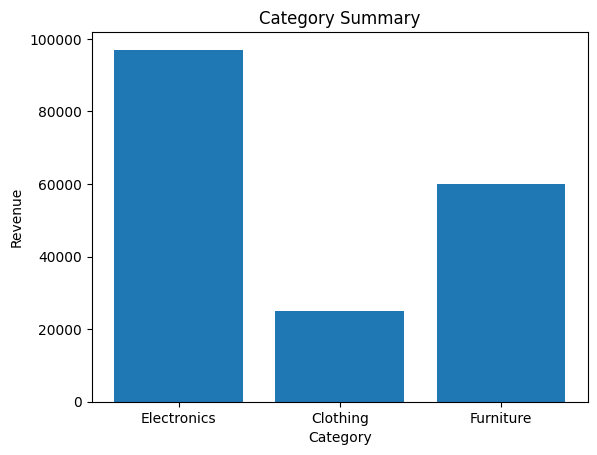

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pdf=category_summary.toPandas()
plt.bar(pdf["category"],pdf["Total_revenue"])
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.title("Category Summary")
plt.show()

# Pie Chart

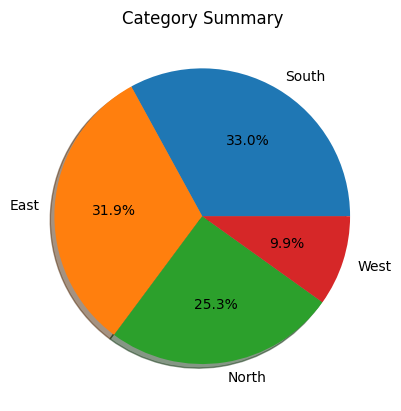

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pdf=region_summary.toPandas()
plt.pie(pdf["Total_revnue"],labels=pdf["region"],autopct="%1.1f%%",shadow=True)
plt.title("Category Summary")
plt.show()

#Scatter Plot

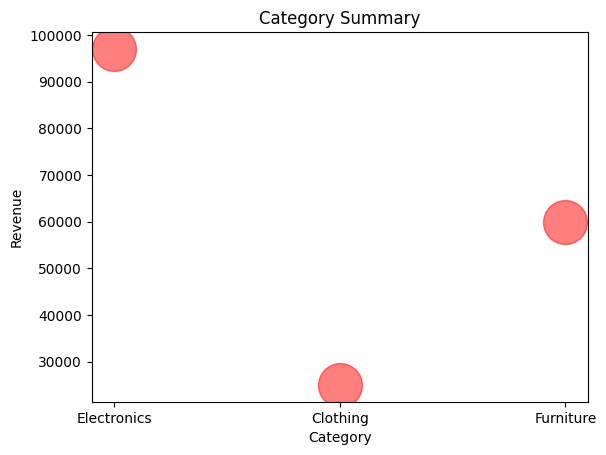

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pdf=category_summary.toPandas()
sizes=np.array([1000])
plt.scatter(pdf["category"],pdf["Total_revenue"],s=sizes,alpha=0.5,color="Red")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.title("Category Summary")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful